### ANN regression model

## Sequential API

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

data set in sklearn

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
 print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


split

In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

standardise

### StandardScaler for standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(X_test)

### random seed used to replicate same results

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
x_train_scaled.shape

(11610, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [13]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["mae"])

mae is mean absolute error

In [15]:
model_history = model.fit(x_train_scaled, y_train, epochs=20, validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3750 - mae: 1.1006 - val_loss: 1.3419 - val_mae: 0.7908
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9039 - mae: 0.7186 - val_loss: 0.8803 - val_mae: 0.6761
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7297 - mae: 0.6442 - val_loss: 0.6683 - val_mae: 0.6127
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6481 - mae: 0.6021 - val_loss: 0.5993 - val_mae: 0.5802
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5904 - mae: 0.5706 - val_loss: 0.5455 - val_mae: 0.5472
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5446 - mae: 0.5460 - val_loss: 0.5063 - val_mae: 0.5243
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5091 - mae: 0.5242 - val_loss: 0.4831 - val_mae: 0.5056
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [16]:
model_history.history

{'loss': [2.375030755996704,
  0.9039026498794556,
  0.729695737361908,
  0.6481310129165649,
  0.590386688709259,
  0.5445750951766968,
  0.5091191530227661,
  0.48077815771102905,
  0.458457350730896,
  0.44200652837753296,
  0.43026602268218994,
  0.4212634861469269,
  0.4148123264312744,
  0.4096638560295105,
  0.4056430459022522,
  0.40220895409584045,
  0.39946919679641724,
  0.39689236879348755,
  0.3941691517829895,
  0.39253780245780945],
 'mae': [1.1006333827972412,
  0.7186387181282043,
  0.644181489944458,
  0.6020946502685547,
  0.5705827474594116,
  0.546032190322876,
  0.5242491960525513,
  0.5066841244697571,
  0.4934503138065338,
  0.48228785395622253,
  0.47416263818740845,
  0.4680907428264618,
  0.46372276544570923,
  0.4599970281124115,
  0.45731979608535767,
  0.45569518208503723,
  0.45327985286712646,
  0.45163482427597046,
  0.44951188564300537,
  0.4485776722431183],
 'val_loss': [1.3418583869934082,
  0.8802766799926758,
  0.6682891249656677,
  0.599252045154

In [17]:
mae_test = model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 2s 15ms/step - loss: 0.3889 - mae: 0.4466


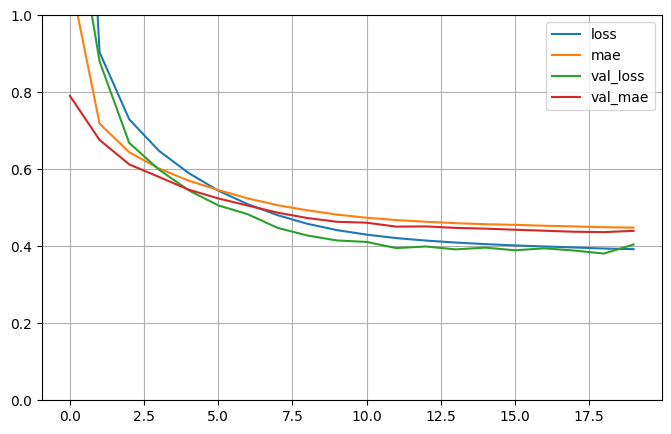

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
X_new = x_test_scaled[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 249ms/step


array([[0.82329357],
       [1.8132737 ],
       [3.9608774 ]], dtype=float32)

## Functional API

In [21]:
del model

In [22]:
keras.backend.clear_session()

In [23]:
input = keras.layers.Input(shape=x_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input], outputs=[output])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [25]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["mae"])

In [26]:
model.history = model.fit(x_train_scaled, y_train, epochs=20, validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6391 - mae: 0.8882 - val_loss: 2.6619 - val_mae: 0.6501
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6860 - mae: 0.6035 - val_loss: 0.6228 - val_mae: 0.5747
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6133 - mae: 0.5726 - val_loss: 0.5872 - val_mae: 0.5484
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5758 - mae: 0.5529 - val_loss: 0.5399 - val_mae: 0.5328
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5471 - mae: 0.5377 - val_loss: 0.5120 - val_mae: 0.5166
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5235 - mae: 0.5261 - val_loss: 0.4894 - val_mae: 0.5053
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5042 - mae: 0.5161 - val_loss: 0.4725 - val_mae: 0.4968
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [27]:
mae_test = model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 2s 11ms/step - loss: 0.4028 - mae: 0.4558


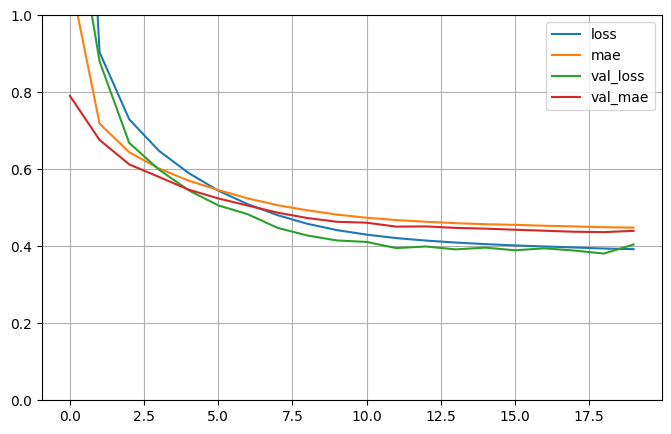

In [29]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Saving Model

In [30]:
model.save("my_keras_model.h5")

In [31]:
del model
keras.backend.clear_session()

In [32]:
model = keras.models.load_model("my_keras_model.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [33]:
y_predd = model.predict(X_new)
y_predd

1/1 [==============================] - 0s 140ms/step


array([[0.6506344],
       [1.6496079],
       [3.4729328]], dtype=float32)

### Save after each epoc using callbacks if very large

In [34]:
# taking a small model to demonstrate the use of callbacks
# clear 
keras.backend.clear_session()

# seeds 
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [36]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["mae"])

In [40]:
# save all models 
# checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

# if you want to save the best only 
checkpoint_cb = keras.callbacks.ModelCheckpoint("Seq_call.h5", save_best_only=True)

In [41]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 5s 13ms/step - loss: 0.4441 - mae: 0.4791 - val_loss: 0.4292 - val_mae: 0.4667
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4360 - mae: 0.4743 - val_loss: 0.4225 - val_mae: 0.4671
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4287 - mae: 0.4712 - val_loss: 0.4176 - val_mae: 0.4588
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4218 - mae: 0.4669 - val_loss: 0.4173 - val_mae: 0.4612
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4167 - mae: 0.4637 - val_loss: 0.4139 - val_mae: 0.4551
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4112 - mae: 0.4609 - val_loss: 0.4128 - val_mae: 0.4526
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4072 - mae: 0.4586 - val_loss: 0.4051 - val_mae: 0.4499
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0

In [42]:
model = keras.models.load_model("Seq_call.h5")

### We can use early stopping - set a high epoc size, if validation score not improving then automatically stop it

In [44]:
# just use this call back along with CHECKPOINT CALLBACK 
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# checkpont callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("Seq_call.h5", save_best_only=True)

patience value - after this epoc, training stops if no improvemwnt 

In [47]:
history = model.fit(x_train_scaled, y_train, epochs=20, validation_data=(x_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3849 - mae: 0.4465 - val_loss: 0.4035 - val_mae: 0.4391
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3830 - mae: 0.4446 - val_loss: 0.4272 - val_mae: 0.4433
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3808 - mae: 0.4439 - val_loss: 0.4172 - val_mae: 0.4376
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3787 - mae: 0.4423 - val_loss: 0.4003 - val_mae: 0.4388
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3773 - mae: 0.4411 - val_loss: 0.3976 - val_mae: 0.4355
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3752 - mae: 0.4401 - val_loss: 0.4091 - val_mae: 0.4340
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3739 - mae: 0.4388 - val_loss: 0.4015 - val_mae: 0.4338
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [49]:
model = keras.models.load_model("Seq_call.h5")
mse_test = model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 1s 7ms/step - loss: 0.3621 - mae: 0.4320
